# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
import matplotlib.pyplot as plt
import wetting

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

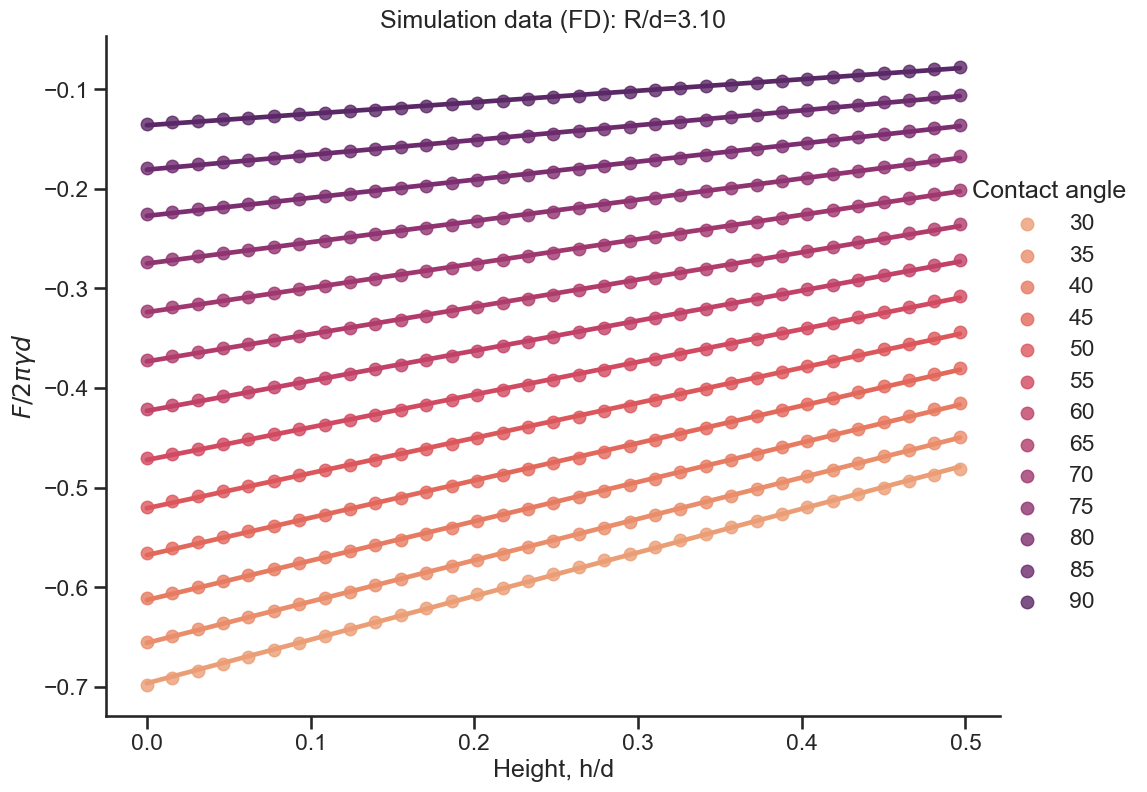

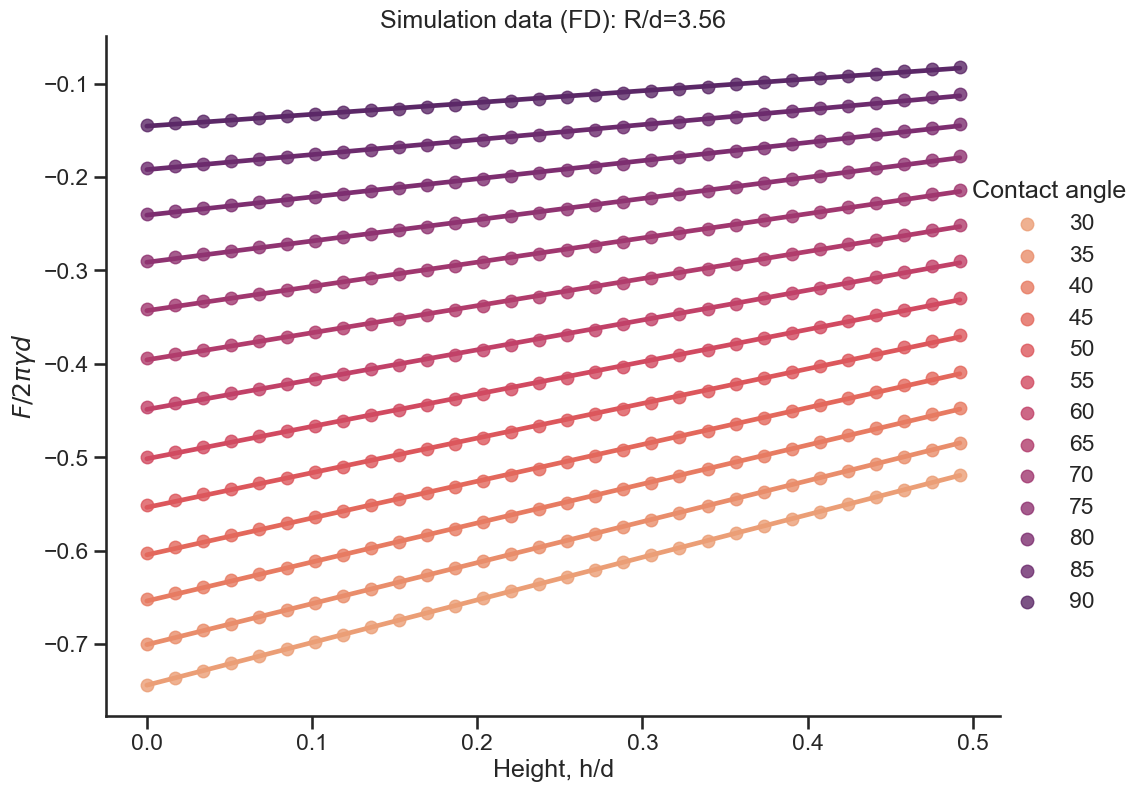

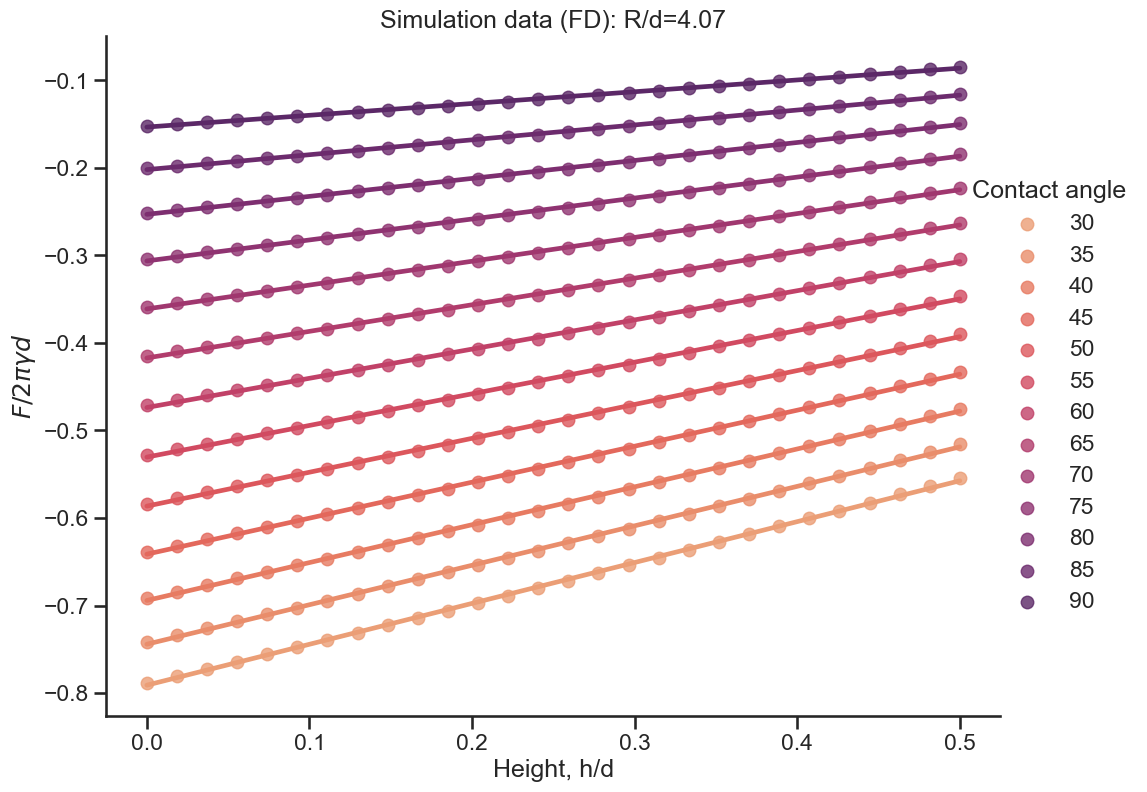

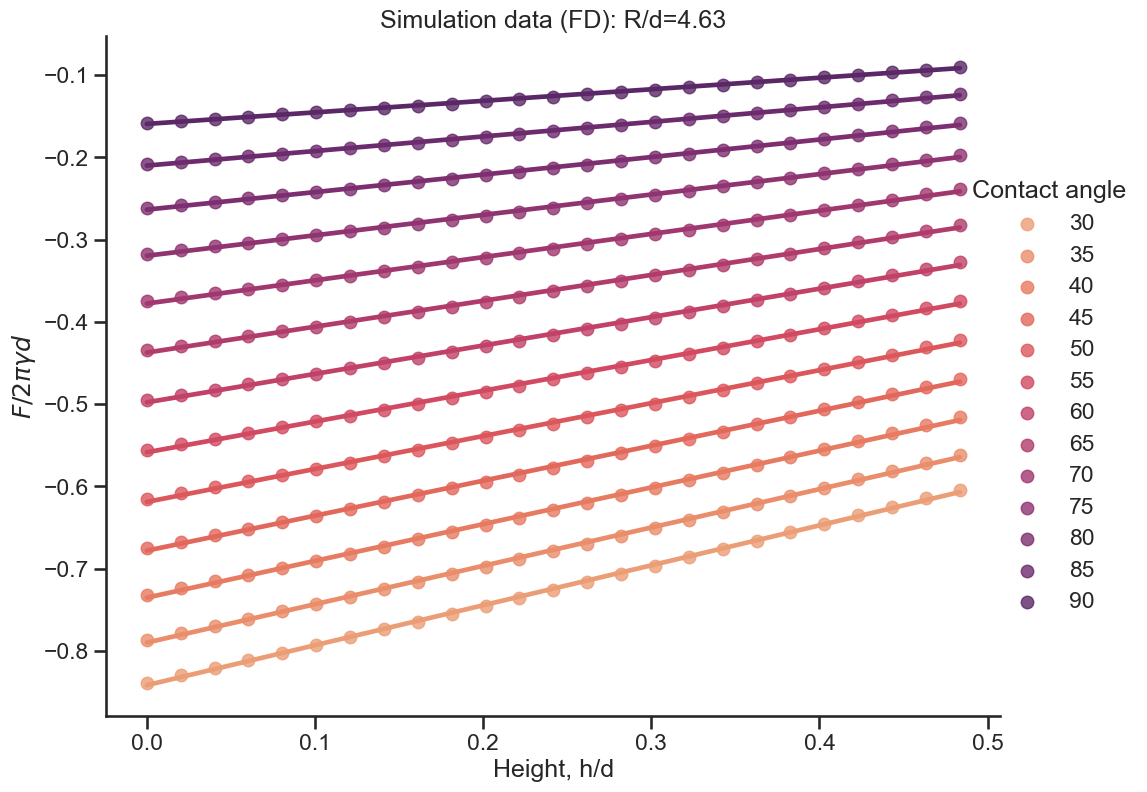

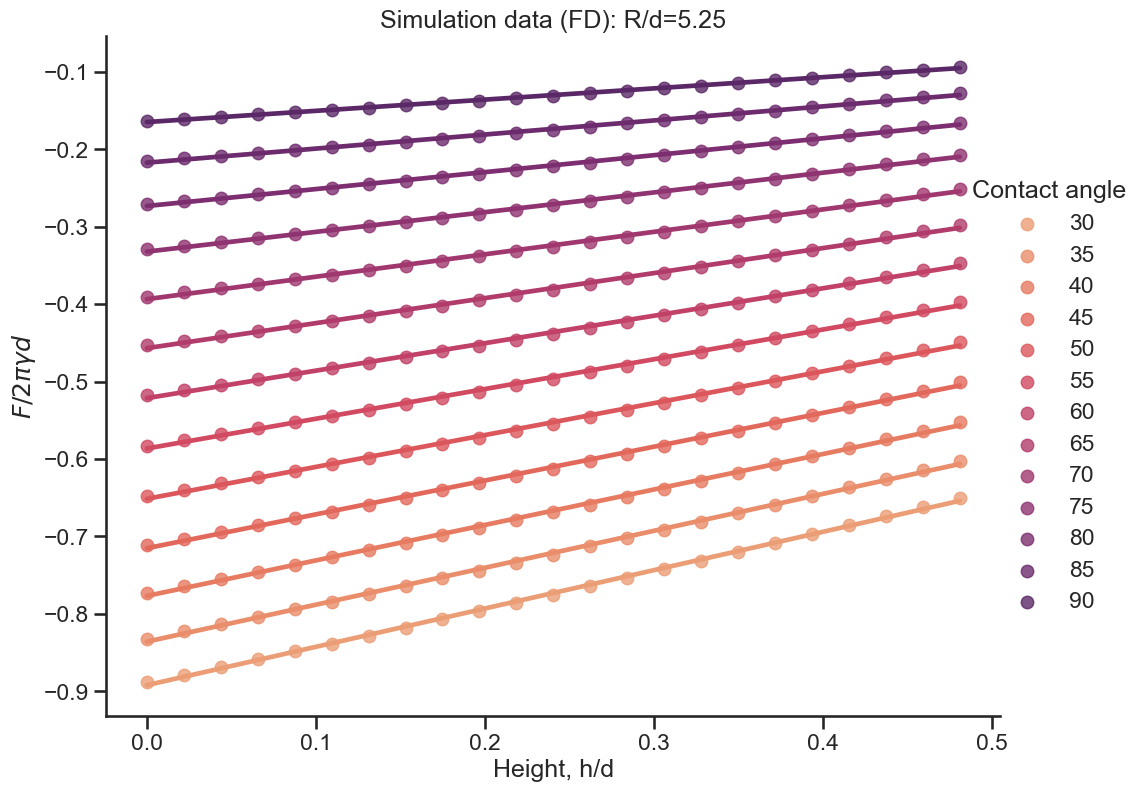

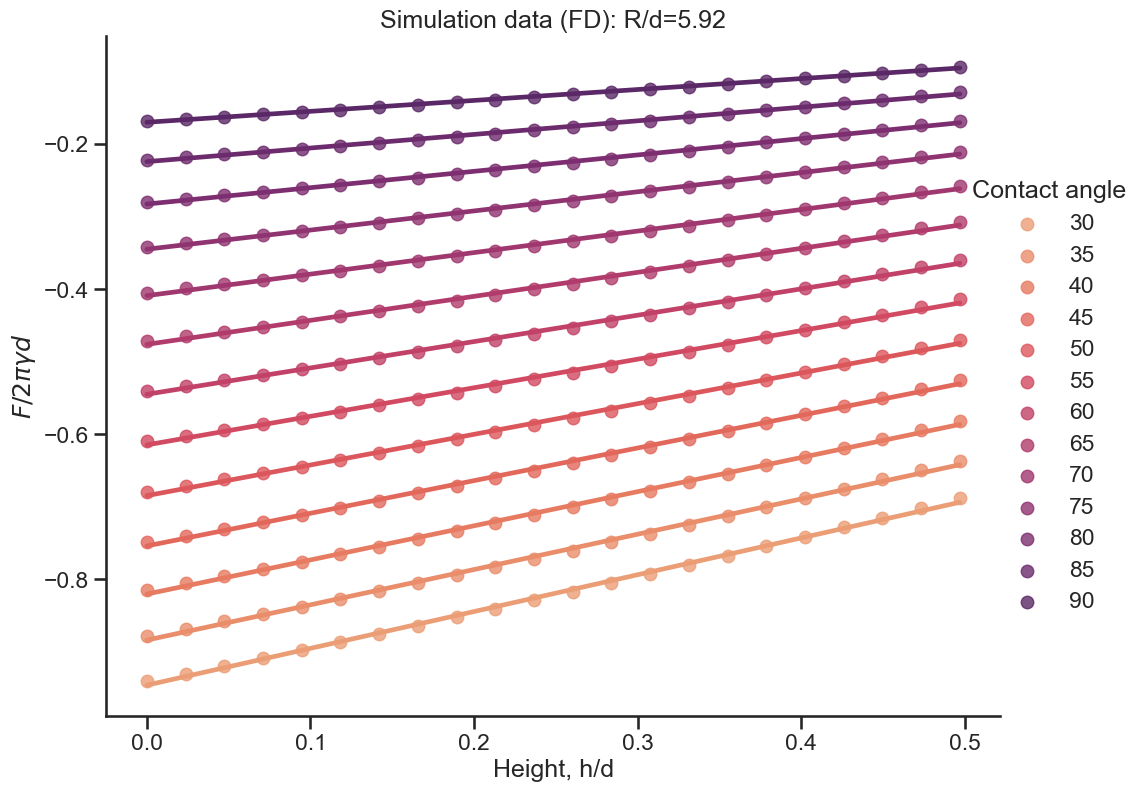

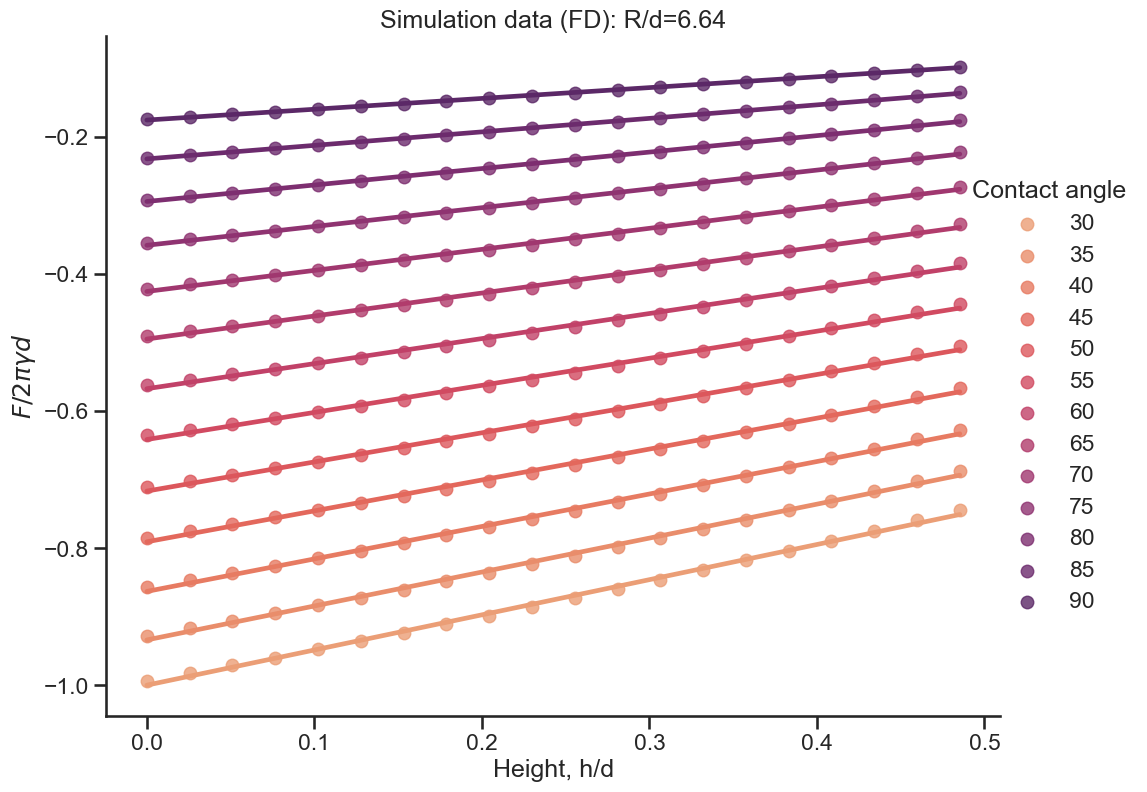

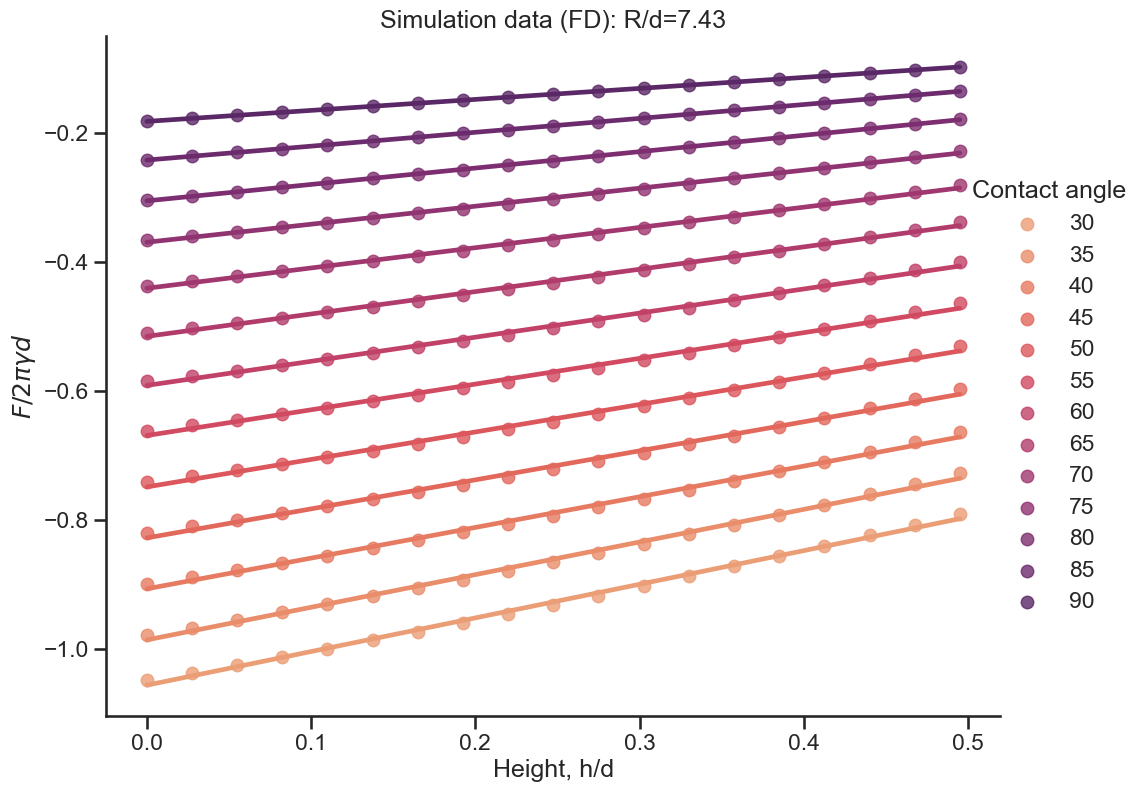

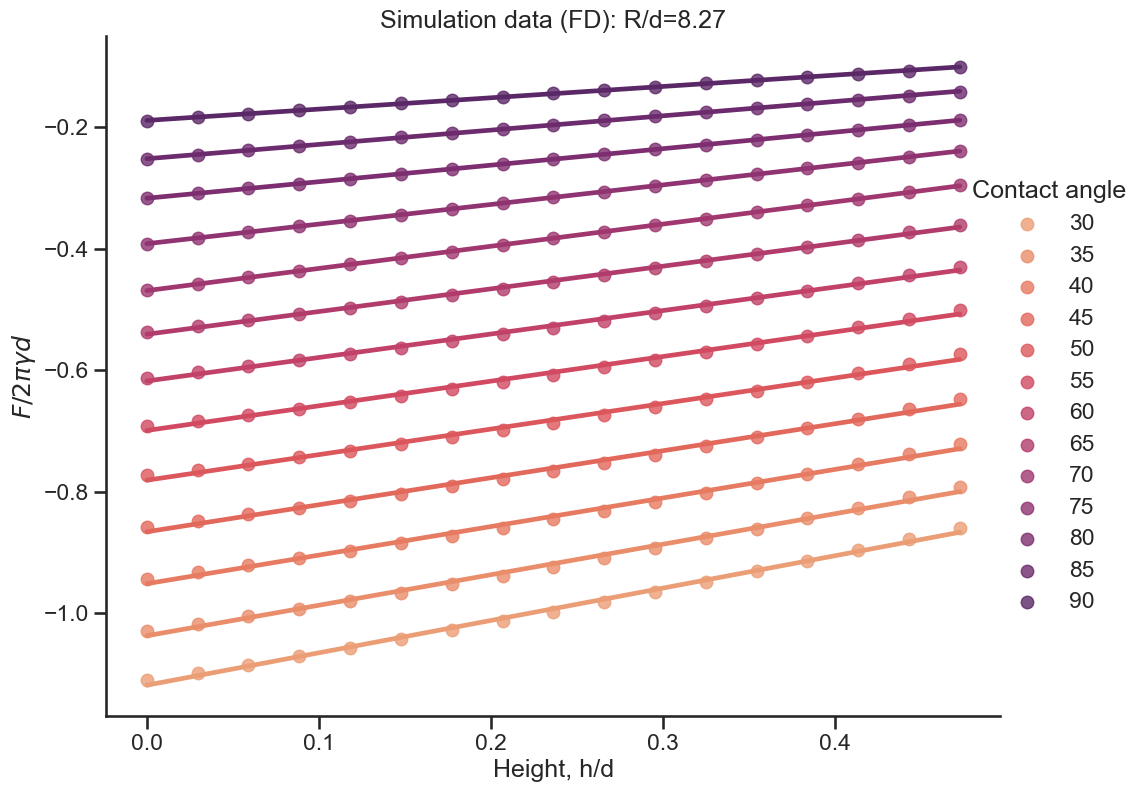

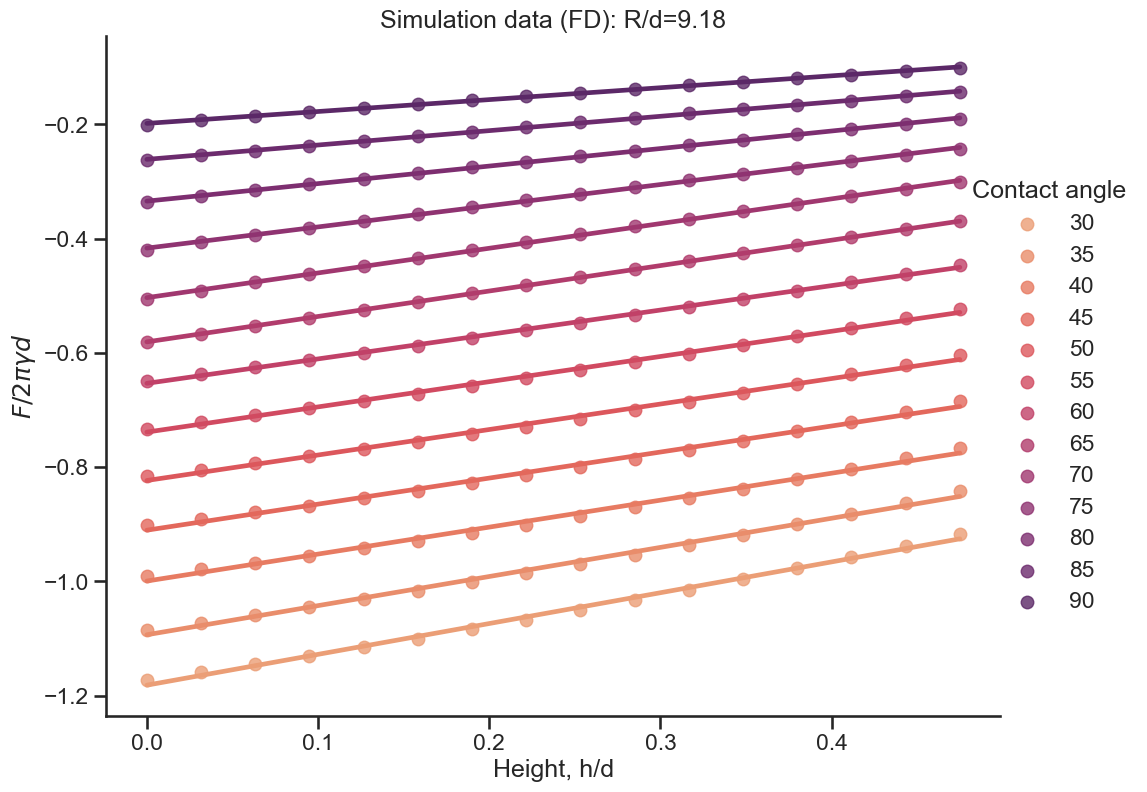

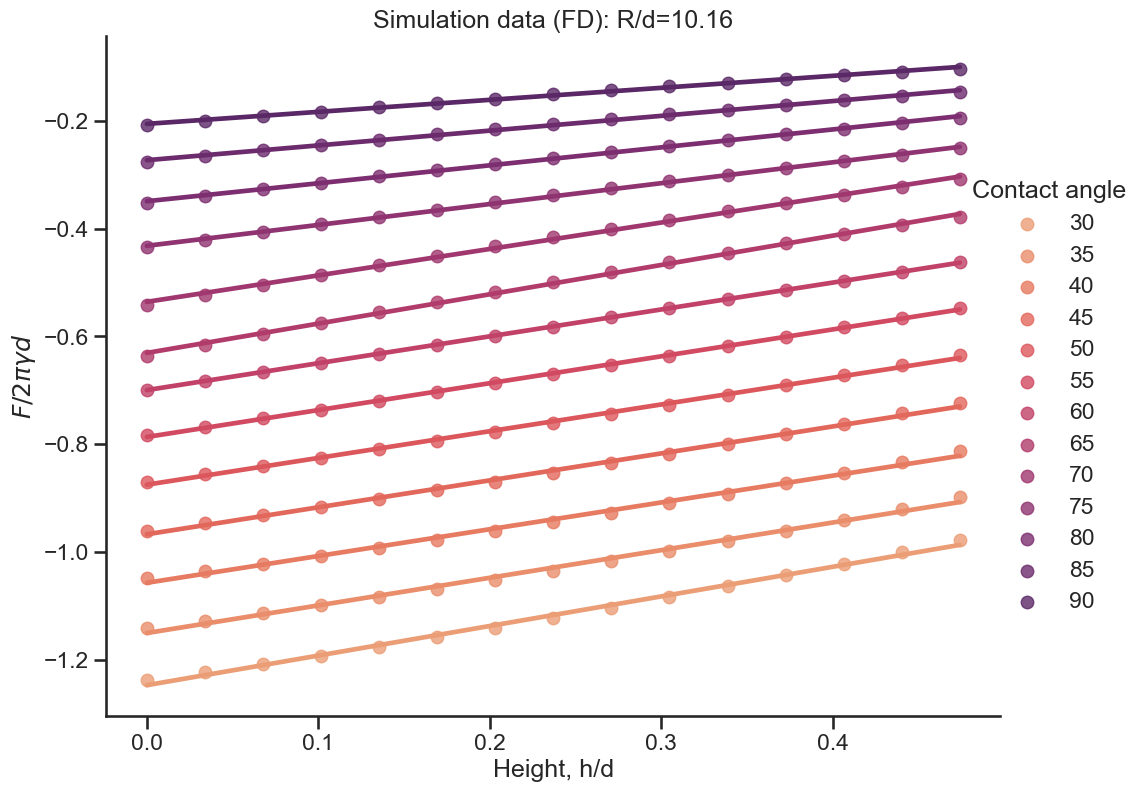

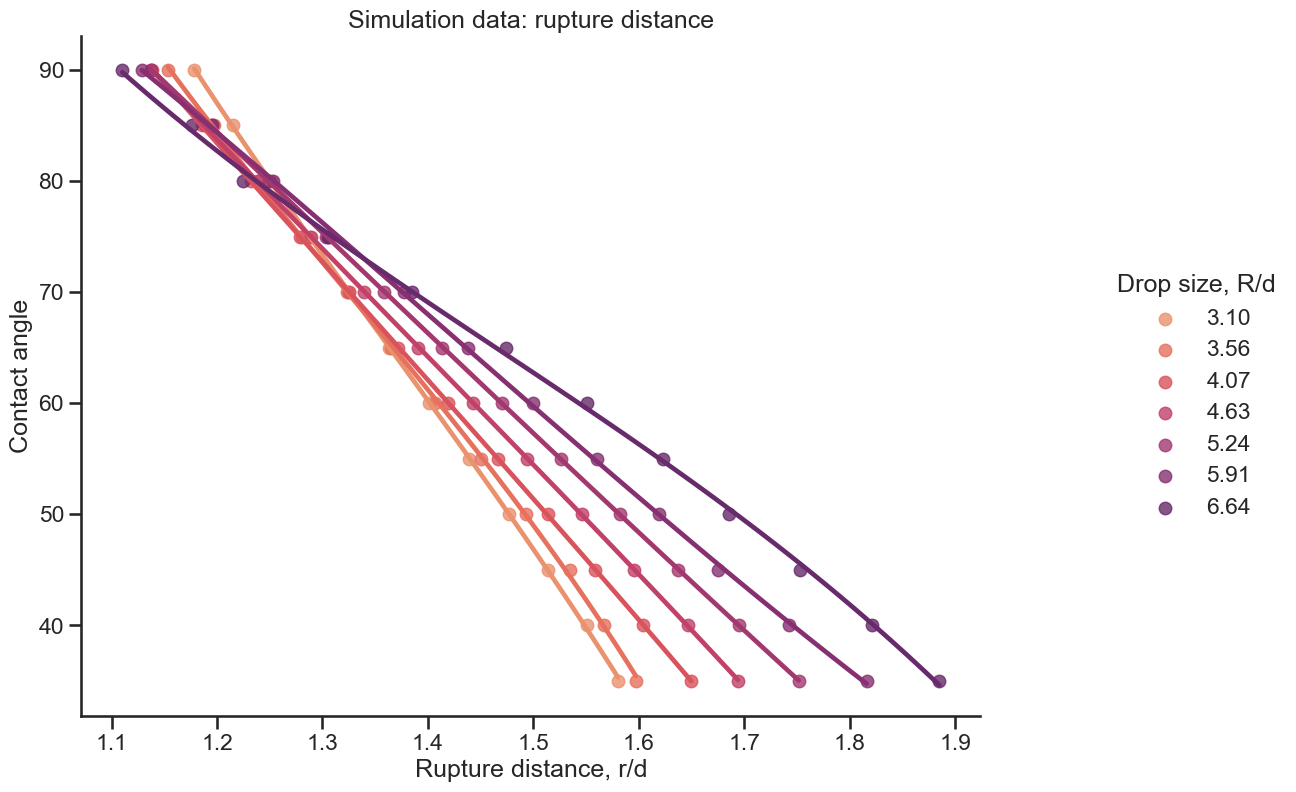

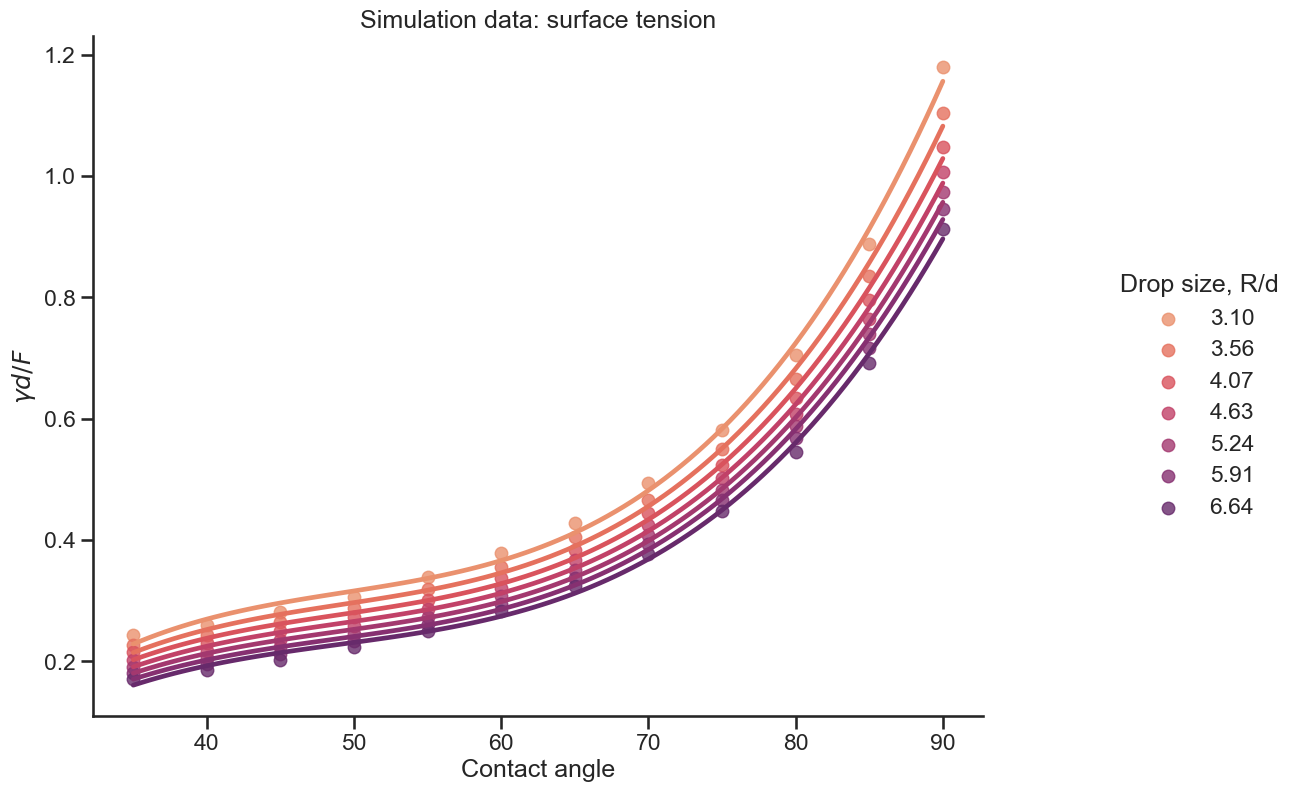

In [2]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = wetting.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [7]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/codes/data/save-area3-2021.11.25-20.41.54.520.jpk'] 
Force data:
 ['E:/Work/AFM/codes/data/force-save_area3_drops-2021.11.25-21.01.41.181.jpk-force', 'E:/Work/AFM/codes/data/force-save_area3_drops-2021.11.25-20.54.12.050.jpk-force'] 
Output folder:
 ['E:/Work/AFM/codes/data/analysis/save-area3-2021.11.25-20.41.54.520.jpk_results_220517-172102']


## AFM image

Image file: E:/Work/AFM/codes/data/save-area3-2021.11.25-20.41.54.520.jpk
Output folder: E:/Work/AFM/codes/data/analysis/save-area3-2021.11.25-20.41.54.520.jpk_results_220517-172102


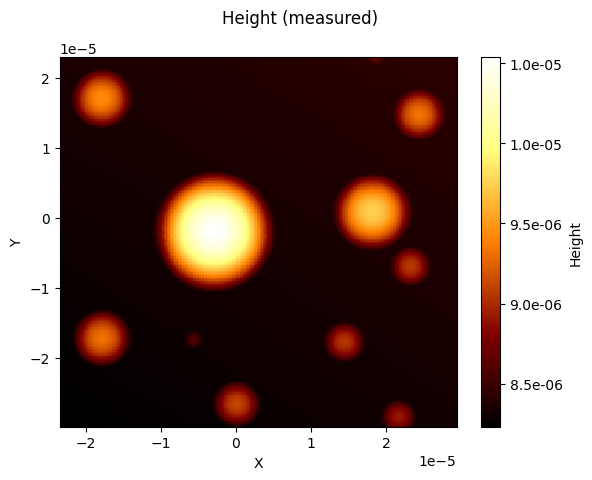

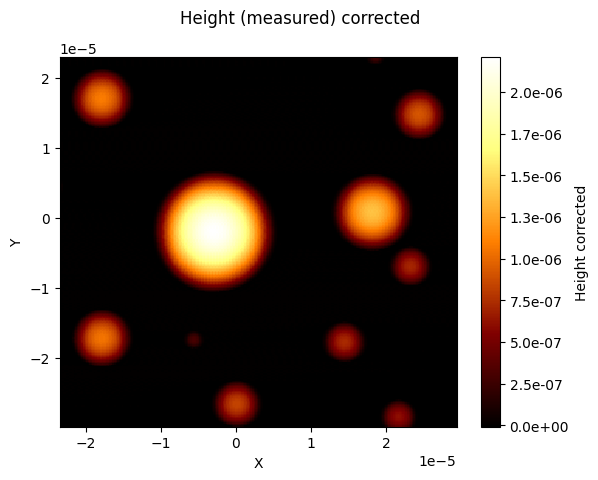

In [8]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.5)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

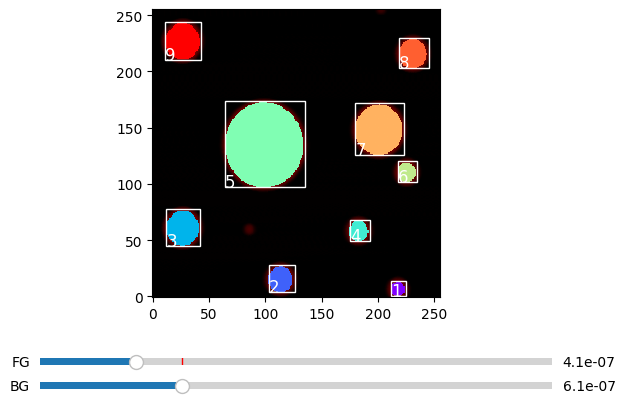

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000006        0.000003  6.017369e-07    6.107355e-07   
1      2   0.000008        0.000004  8.181257e-07    8.377885e-07   
2      3   0.000009        0.000004  1.038784e-06    1.055213e-06   
3      4   0.000006        0.000003  7.260453e-07    7.263608e-07   
4      5   0.000018        0.000009  2.168319e-06    2.209616e-06   
5      6   0.000007        0.000003  6.988151e-07    7.141052e-07   
6      7   0.000012        0.000006  1.389089e-06    1.396628e-06   
7      8   0.000008        0.000004  9.184824e-07    9.210514e-07   
8      9   0.000009        0.000004  1.082580e-06    1.089055e-06   

         Volume    Volume raw  Drop contact angle Max Adhesion         s  \
0  6.212890e-18  3.088506e-18           26.654300         None  0.000001   
1  1.657504e-17  1.139219e-17           25.883867         None  0.000002   
2  2.965860e-17  2.406016e-17           27.651558         None  0.000002   
3  1.000500e-17  6.594905e-18           27.815953         None  0.000001   
4  2.592693e-16  2.441151e-16           28.193567         None  0.000004   
5  1.006026e-17  5.903000e-18           26.222151         None  0.000001   
6  6.748701e-17  6.077752e-17           28.332372         None  0.000003   
7  1.959645e-17  1.552034e-17           28.270570         None  0.000002   
8  3.198571e-17  2.690153e-17           28.314929         None  0.000002   

        R/d                                           AFM file  
0  4.221362  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
1  4.351592  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
2  4.063377  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
3  4.038402  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
4  3.982113  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
5  4.293484  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
6  3.961792  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
7  3.970816  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
8  3.964335  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...

In [9]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

In [ ]:
fd_drop_df = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                     force_cycle = 'approach', fit_order = 2,
                                     output_path = output_paths[0])
display(fd_drop_df)

-5.5932136553815067e-08 0.0453351793071892 -1.2337468916759178e-06
-5.529272731963321e-08 0.04313644018649679 -1.281810160518108e-06
-5.540561868720927e-08 0.043512380161571454 -1.2733299920959389e-06
-5.543402344252397e-08 0.04414833573760851 -1.2556311017473202e-06
-5.5554313565248266e-08 0.045284844672508553 -1.226774961181971e-06
-5.5337388851088745e-08 0.04337893907466446 -1.2756740951142496e-06
-5.6923917722577924e-08 0.06510459263912716 -8.743456554302633e-07
-5.558084301861777e-08 0.04556931107022305 -1.219698997269605e-06
-5.537894220823242e-08 0.04370227853650819 -1.2671866104640227e-06
-5.547890381356163e-08 0.04453642675765404 -1.2456972382506418e-06
-5.541498632196543e-08 0.04398732158369096 -1.2597945118466015e-06


## Droplet surface tension calculation

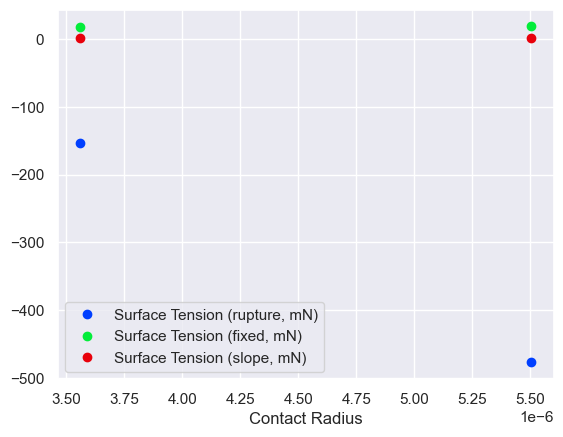

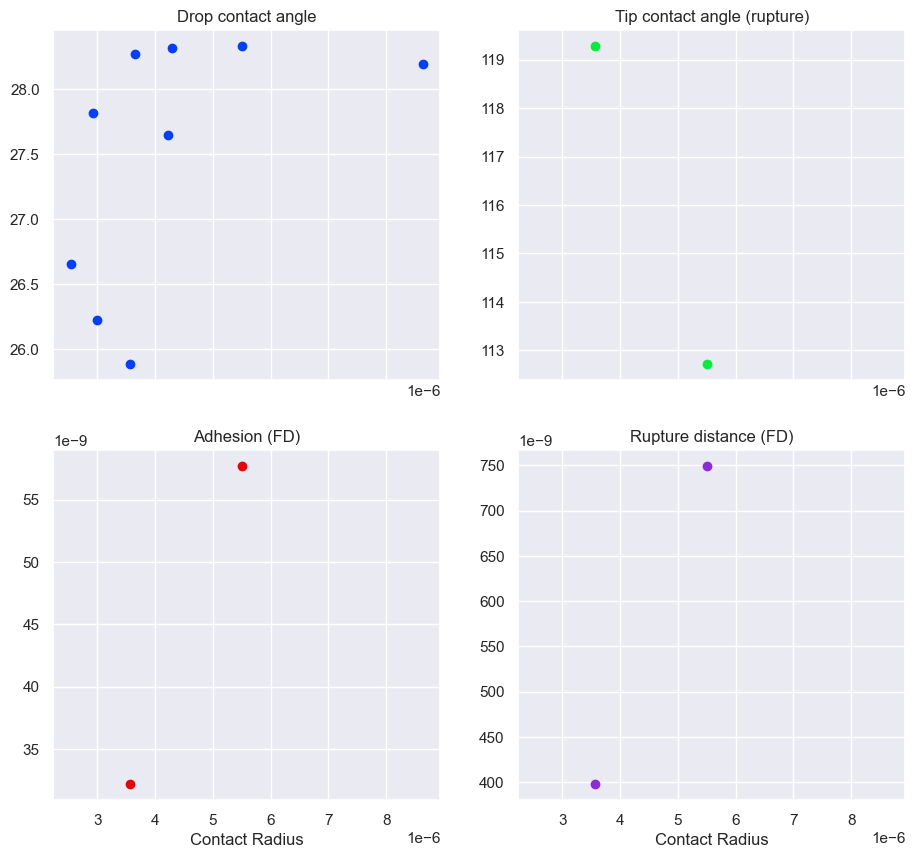

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
1       0.000006        0.000003  6.017369e-07    6.107355e-07  6.212890e-18   
2       0.000008        0.000004  8.181257e-07    8.377885e-07  1.657504e-17   
3       0.000009        0.000004  1.038784e-06    1.055213e-06  2.965860e-17   
4       0.000006        0.000003  7.260453e-07    7.263608e-07  1.000500e-17   
5       0.000018        0.000009  2.168319e-06    2.209616e-06  2.592693e-16   
6       0.000007        0.000003  6.988151e-07    7.141052e-07  1.006026e-17   
7       0.000012        0.000006  1.389089e-06    1.396628e-06  6.748701e-17   
8       0.000008        0.000004  9.184824e-07    9.210514e-07  1.959645e-17   
9       0.000009        0.000004  1.082580e-06    1.089055e-06  3.198571e-17   

         Volume raw  Drop contact angle Max Adhesion         s       R/d  ...  \
Label                                                                     ...   
1      3.088506e-18           26.654300         None  0.000001  4.221362  ...   
2      1.139219e-17           25.883867         None  0.000002  4.351592  ...   
3      2.406016e-17           27.651558         None  0.000002  4.063377  ...   
4      6.594905e-18           27.815953         None  0.000001  4.038402  ...   
5      2.441151e-16           28.193567         None  0.000004  3.982113  ...   
6      5.903000e-18           26.222151         None  0.000001  4.293484  ...   
7      6.077752e-17           28.332372         None  0.000003  3.961792  ...   
8      1.552034e-17           28.270570         None  0.000002  3.970816  ...   
9      2.690153e-17           28.314929         None  0.000002  3.964335  ...   

      FD Y position                                            FD file  \
Label                                                                    
1               NaN                                                NaN   
2     -2.730297e-05  E:/Work/AFM/codes/data/force-save_area3_drops-...   
3               NaN                                                NaN   
4               NaN                                                NaN   
5               NaN                                                NaN   
6               NaN                                                NaN   
7      2.408177e-07  E:/Work/AFM/codes/data/force-save_area3_drops-...   
8               NaN                                                NaN   
9               NaN                                                NaN   

       Simulation R/s  Surface Tension (rupture, mN)  \
Label                                                  
1            4.073223                            NaN   
2            4.073223                    -153.343457   
3            4.073223                            NaN   
4            4.073223                            NaN   
5            4.073223                            NaN   
6            4.073223                            NaN   
7            4.073223                    -476.919281   
8            4.073223                            NaN   
9            4.073223                            NaN   

       Tip contact angle (rupture)  F_fit_actual  Surface Tension (fixed, mN)  \
Label                                                                           
1                              NaN           NaN                          NaN   
2                       119.276373      0.040827                    17.448857   
3                              NaN           NaN                          NaN   
4                              NaN           NaN                          NaN   
5                              NaN           NaN                          NaN   
6                              NaN           NaN                          NaN   
7                       112.713585      0.013855                    18.416887   
8                              NaN           NaN                         

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
1       0.000006        0.000003  6.017369e-07    6.107355e-07  6.212890e-18   
2       0.000008        0.000004  8.181257e-07    8.377885e-07  1.657504e-17   
3       0.000009        0.000004  1.038784e-06    1.055213e-06  2.965860e-17   
4       0.000006        0.000003  7.260453e-07    7.263608e-07  1.000500e-17   
5       0.000018        0.000009  2.168319e-06    2.209616e-06  2.592693e-16   
6       0.000007        0.000003  6.988151e-07    7.141052e-07  1.006026e-17   
7       0.000012        0.000006  1.389089e-06    1.396628e-06  6.748701e-17   
8       0.000008        0.000004  9.184824e-07    9.210514e-07  1.959645e-17   
9       0.000009        0.000004  1.082580e-06    1.089055e-06  3.198571e-17   

         Volume raw  Drop contact angle Max Adhesion         s       R/d  ...  \
Label                                                                     ...   
1      3.088506e-18           26.654300         None  0.000001  4.221362  ...   
2      1.139219e-17           25.883867         None  0.000002  4.351592  ...   
3      2.406016e-17           27.651558         None  0.000002  4.063377  ...   
4      6.594905e-18           27.815953         None  0.000001  4.038402  ...   
5      2.441151e-16           28.193567         None  0.000004  3.982113  ...   
6      5.903000e-18           26.222151         None  0.000001  4.293484  ...   
7      6.077752e-17           28.332372         None  0.000003  3.961792  ...   
8      1.552034e-17           28.270570         None  0.000002  3.970816  ...   
9      2.690153e-17           28.314929         None  0.000002  3.964335  ...   

      Wetted length (FD)  Rupture distance (FD)  Adhesion energy (FD)  \
Label                                                                   
1                    NaN                    NaN                   NaN   
2           7.204120e-07           3.975344e-07          7.603352e-15   
3                    NaN                    NaN                   NaN   
4                    NaN                    NaN                   NaN   
5                    NaN                    NaN                   NaN   
6                    NaN                    NaN                   NaN   
7           1.300818e-06           7.490898e-07          2.798941e-14   
8                    NaN                    NaN                   NaN   
9                    NaN                    NaN                   NaN   

       FD X position  FD Y position  \
Label                                 
1                NaN            NaN   
2      -1.443661e-07  -2.730297e-05   
3                NaN            NaN   
4                NaN            NaN   
5                NaN            NaN   
6                NaN            NaN   
7       1.817459e-05   2.408177e-07   
8                NaN            NaN   
9                NaN            NaN   

                                                 FD file      yd/F  \
Label                                                                
1                                                    NaN       NaN   
2      E:/Work/AFM/codes/data/force-save_area3_drops-...  0.016835   
3                                                    NaN       NaN   
4                                                    NaN       NaN   
5                                                    NaN       NaN   
6                                                    NaN       NaN   
7      E:/Work/AFM/codes/data/force-save_area3_drops-...  0.025721   
8                                                    NaN       NaN   
9                                                    NaN       NaN   

       Surface Tension FD (mN) Simulation contact angle  \
Label                                                     
1                          NaN                      NaN   
2                     0.662217             -8827.456

In [13]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension

afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'))

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

output_df_filtered = output_df[output_df['FD file'] != '']


# calculate surface tension from FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
output_df_filtered2 = output_df2[output_df['FD file'] != '']


ax = output_df_filtered.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df_filtered2['Contact Radius'],output_df_filtered2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df_filtered.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df_filtered)
display(output_df_filtered2)
plt.close('all')

## Combine results from different folders

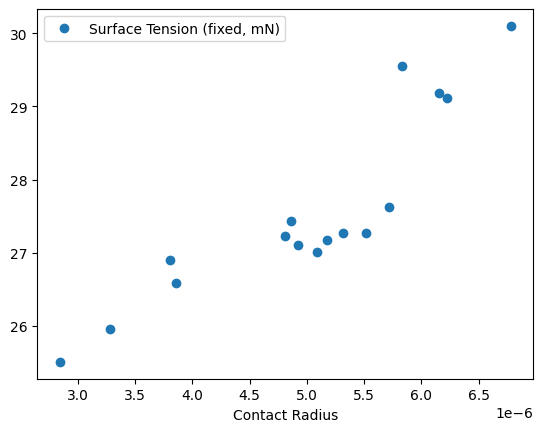

Label     Curvature  Contact Radius    Max Height  Max Height raw  \
0      1  1.674239e-05    6.157481e-06  1.173413e-06    1.176261e-06   
1      2  1.658482e-05    6.227310e-06  1.213520e-06    1.213881e-06   
2      3  1.894432e-05    6.781209e-06  1.255271e-06    1.258837e-06   
3      4  1.637195e-05    5.831479e-06  1.073761e-06    1.073698e-06   
0      1  1.674239e-05    6.157481e-06  1.173413e-06    1.176261e-06   
1      2  1.658482e-05    6.227310e-06  1.213520e-06    1.213881e-06   
2      3  1.894432e-05    6.781209e-06  1.255271e-06    1.258837e-06   
3      4  1.637195e-05    5.831479e-06  1.073761e-06    1.073698e-06   
0      1  1.065735e-05    3.860449e-06  7.237681e-07    7.231064e-07   
1      2  9.147127e-06    3.277518e-06  6.073489e-07    6.081277e-07   
2      3  8.553467e-06    2.844199e-06  4.867249e-07    4.900713e-07   
3      4  1.103012e-05    3.801442e-06  6.757686e-07    6.753954e-07   
4      5  6.870082e-06    1.840481e-06  2.511202e-07    2.599466e-07   
5      6  3.249245e-07    2.996106e-07  1.991890e-07    2.512266e-07   
0      1  1.065735e-05    3.860449e-06  7.237681e-07    7.231064e-07   
1      2  9.147127e-06    3.277518e-06  6.073489e-07    6.081277e-07   
2      3  8.553467e-06    2.844199e-06  4.867249e-07    4.900713e-07   
3      4  1.103012e-05    3.801442e-06  6.757686e-07    6.753954e-07   
0      1  1.376725e-05    5.714617e-06  1.242063e-06    1.244770e-06   
1      2  1.199087e-05    4.862701e-06  1.030254e-06    1.032407e-06   
2      3  1.369428e-05    5.179605e-06  1.017332e-06    1.027882e-06   
3      4  1.359125e-05    5.089097e-06  9.887437e-07    9.882893e-07   
0      1  1.376725e-05    5.714617e-06  1.242063e-06    1.244770e-06   
1      2  1.199087e-05    4.862701e-06  1.030254e-06    1.032407e-06   
2      3  1.369428e-05    5.179605e-06  1.017332e-06    1.027882e-06   
3      4  1.359125e-05    5.089097e-06  9.887437e-07    9.882893e-07   
0      1  1.046537e-05    4.810952e-06  1.171355e-06    1.175492e-06   
1      2  1.054729e-05    4.925837e-06  1.220905e-06    1.219268e-06   
2      3  1.228304e-05    5.314052e-06  1.209020e-06    1.205708e-06   
3      4  1.284478e-05    5.517966e-06  1.245624e-06    1.248238e-06   
0      1  1.046537e-05    4.810952e-06  1.171355e-06    1.175492e-06   
1      2  1.054729e-05    4.925837e-06  1.220905e-06    1.219268e-06   
2      3  1.228304e-05    5.314052e-06  1.209020e-06    1.205708e-06   
3      4  1.284478e-05    5.517966e-06  1.245624e-06    1.248238e-06   

         Volume    Volume raw  Drop contact angle  Max Adhesion  \
0  7.072981e-17  6.048181e-17           21.578634           NaN   
1  7.485670e-17  6.534649e-17           22.054140           NaN   
2  9.170729e-17  8.009385e-17           20.974642           NaN   
3  5.800499e-17  4.846766e-17           20.866223           NaN   
0  7.072981e-17  6.048181e-17           21.578634           NaN   
1  7.485670e-17  6.534649e-17           22.054140           NaN   
2  9.170729e-17  8.009385e-17           20.974642           NaN   
3  5.800499e-17  4.846766e-17           20.866223           NaN   
0  1.714169e-17  1.560711e-17           21.237417           NaN   
1  1.036552e-17  9.041134e-18           20.996515           NaN   
2  6.245143e-18  5.012872e-18           19.421804           NaN   
3  1.550120e-17  1.378008e-17           20.159932           NaN   
4  1.344470e-18  3.204188e-19           15.539224           NaN   
5  3.222467e-20  0.000000e+00           67.234004           NaN   
0  1.714169e-17  1.560711e-17           21.237417           NaN   
1  1.036552e-17  9.041134e-18           20.996515           NaN   
2  6.245143e-18  5.012872e-18           19.421804           NaN   
3  1.550120e-17  1.378008e-17           20.159932           NaN   
0  6.471769e-17  5.778598e-17           24.524849           NaN   
1  3.883912e-17  3.314374e-17           23.924574           NaN   
2  4.342353e-17  3.623017e-17           22.224164           NaN   
3  4.073

In [53]:
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']
summary_df = summary_df[summary_df['Surface Tension (fixed, mN)'] != 0]
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[#'Surface Tension (rupture, mN)',
                        'Surface Tension (fixed, mN)'#,
                        #'Surface Tension FD (mN)'
                       ],
                             marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [67]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

